In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("HUNT_USDT_transactions.csv")
data["block_timestamp"] = pd.to_datetime(data["block_timestamp"])

Monthly Transaction Count

In [15]:
ONLY_MONTH = data["block_timestamp"].groupby([data["block_timestamp"].dt.month]).agg("count")
ONLY_MONTH = ONLY_MONTH.to_frame(name = "transaction_count")
ONLY_MONTH["month"] = ONLY_MONTH.index
ONLY_MONTH.index = ([i for i in range(ONLY_MONTH.shape[0])])

<AxesSubplot:xlabel='month', ylabel='transaction_count'>

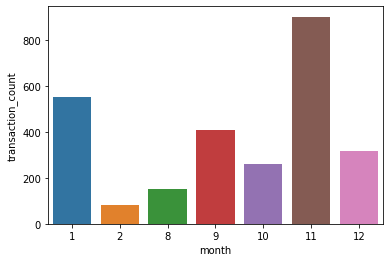

In [16]:
sns.barplot(data = ONLY_MONTH, x = "month", y = "transaction_count")

Hourly Version of Transaction Count

In [17]:
ONLY_HOUR = data["block_timestamp"].groupby([data["block_timestamp"].dt.hour]).agg("count")
ONLY_HOUR = ONLY_HOUR.to_frame(name = "transaction_count")
ONLY_HOUR["hour"] = ONLY_HOUR.index
ONLY_HOUR.index = ([i for i in range(ONLY_HOUR.shape[0])])

<AxesSubplot:xlabel='hour', ylabel='transaction_count'>

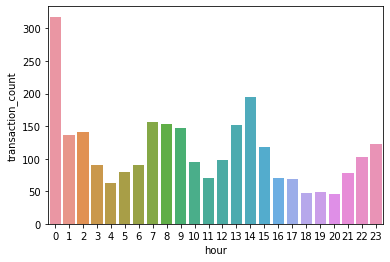

In [18]:
sns.barplot(data = ONLY_HOUR, x = "hour", y = "transaction_count")